In [2]:
import numpy as np
import glob
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [3]:
#df = pd.read_csv('science_&stem_salaries.csv')
df = pd.read_csv('Resources/combined4.csv')
df
 

,COMID,Job_Title,Avg_Salary,Location,Company_Name
0,DC0,Data Scientist,72.0,"Albuquerque, NM",Tecolote Research\n3.8
1,DC1,Healthcare Data Scientist,87.5,"Linthicum, MD",University of Maryland Medical System\n3.4
2,DC2,Data Scientist,85.0,"Clearwater, FL",KnowBe4\n4.8
3,DC3,Data Scientist,76.5,"Richland, WA",PNNL\n3.8
4,DC4,Data Scientist,114.5,"New York, NY",Affinity Solutions\n2.9
...,...,...,...,...,...
63379,LF62637,Software Engineer,155000.0,"Seattle, WA",Google
63380,LF62638,Software Engineer,146900.0,"Redmond, WA",Microsoft
63381,LF62639,Software Engineer,157000.0,"Seattle, WA",MSFT
63382,LF62640,Software Engineer,194688.0,"San Francisco, CA",Salesforce


### choose columns

In [4]:
df.columns

Index(['COMID', 'Job_Title', 'Avg_Salary', 'Location', 'Company_Name'], dtype='object')

In [5]:
#df_model = df[['avg_salary','Type of ownership','Sector',
            # 'job_state','python_yn','spark','aws','excel','job_simp','seniority',]]
df_model = df[['Job_Title','Avg_Salary','Location', 'Company_Name']]
df_model


,Job_Title,Avg_Salary,Location,Company_Name
0,Data Scientist,72.0,"Albuquerque, NM",Tecolote Research\n3.8
1,Healthcare Data Scientist,87.5,"Linthicum, MD",University of Maryland Medical System\n3.4
2,Data Scientist,85.0,"Clearwater, FL",KnowBe4\n4.8
3,Data Scientist,76.5,"Richland, WA",PNNL\n3.8
4,Data Scientist,114.5,"New York, NY",Affinity Solutions\n2.9
...,...,...,...,...
63379,Software Engineer,155000.0,"Seattle, WA",Google
63380,Software Engineer,146900.0,"Redmond, WA",Microsoft
63381,Software Engineer,157000.0,"Seattle, WA",MSFT
63382,Software Engineer,194688.0,"San Francisco, CA",Salesforce


In [ ]:
df_model['Job_Title'].unique()


In [ ]:
df_model['Industry'].unique.summer 


In [15]:
#label Encoder

labelEncoder = preprocessing.LabelEncoder()

# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in df_model:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print(mapping_dict)

df_model

{'Job_Title': {'Ag Data Scientist': 0, 'Analytics - Business Assurance Data Analyst': 1, 'Analytics Consultant': 2, 'Analytics Manager': 3, 'Analytics Manager - Data Mart': 4, 'Assistant Director/Director, Office of Data Science': 5, 'Associate Data Analyst': 6, 'Associate Data Analyst- Graduate Development Program': 7, 'Associate Data Engineer': 8, 'Associate Data Scientist/Computer Scientist': 9, 'Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence': 10, 'Associate Director/Director, Safety Scientist': 11, 'Associate Environmental Scientist - Wildlife Biologist': 12, 'Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad': 13, 'Associate Principal Scientist, Pharmacogenomics': 14, 'Associate Research Scientist I (Protein Expression and Production)': 15, 'Associate Scientist': 16, 'Associate Scientist / Sr. Associate Scientist, Antibody Discovery': 17, 'Associate Scientist, LC/MS Biologics': 18, 'Associate Scientist/Scientist, Proces

,Job_Title,Avg_Salary,Location,Company_Name
0,Data Scientist,72.0,"Albuquerque, NM",Tecolote Research\n3.8
1,Healthcare Data Scientist,87.5,"Linthicum, MD",University of Maryland Medical System\n3.4
2,Data Scientist,85.0,"Clearwater, FL",KnowBe4\n4.8
3,Data Scientist,76.5,"Richland, WA",PNNL\n3.8
4,Data Scientist,114.5,"New York, NY",Affinity Solutions\n2.9
...,...,...,...,...
63379,Software Engineer,155000.0,"Seattle, WA",Google
63380,Software Engineer,146900.0,"Redmond, WA",Microsoft
63381,Software Engineer,157000.0,"Seattle, WA",MSFT
63382,Software Engineer,194688.0,"San Francisco, CA",Salesforce


In [62]:
df_model['Type of ownership'].unique() 

array([ 2,  7,  4,  3,  5,  9,  6, 10,  1,  8,  0])

### get dummy data

In [8]:
df_dum = pd.get_dummies(df_model)


In [28]:
#df_dum.columns


Index(['avg_salary', 'hourly', 'python_yn', 'spark', 'aws', 'excel',
       'Type of ownership_-1', 'Type of ownership_College / University',
       'Type of ownership_Company - Private',
       'Type of ownership_Company - Public',
       ...
       'job_simp_analyst', 'job_simp_data engineer', 'job_simp_data scientist',
       'job_simp_director', 'job_simp_manager', 'job_simp_mle', 'job_simp_na',
       'seniority_jr', 'seniority_na', 'seniority_senior'],
      dtype='object', length=149)

### train test split

In [16]:
#
from sklearn.model_selection import train_test_split

X = df_model.drop('Avg_Salary', axis =1)
y = df_model.Avg_Salary.values

#creating the train set and test set
# we split by .2 meain 20% of the data will be in our test set and the other 80 will be in our train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### mutliple linear regression
#### we will do one in stats models and sklearn model in oreder to compare the two

In [17]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [9]:
# # importing r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
# score=r2_score(y,X_sm)
# print(score)
# print(mean_squared_error(y,X_sm))
# print(np.sqrt(mean_squared_error(y,X_sm)))

In [36]:
# we'll use corss valdation score which takes a sample of data and a valdation 
# set from the model and run it on the sample and evaulate on the valdation set thats held out in other to see if genralized okay
#kinda like a mini train test split to see if the model would do okay

from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.model_selection import cross_val_score      

lm = LinearRegression()
lm.fit(X_train, y_train)

#i want to see the the mean absoulte error to show how far on avg we are off the prediction 
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-37.20074915492783

### lasso regression

##### Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). 

##### As alpha(λ) increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).

#### As λ increases, bias increases.

#### As λ decreases, variance increases.As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).

#### As λ increases, bias increases.

#### As λ decreases, variance increases.

In [13]:
lm_l = Lasso(alpha=0.002)
lm_l.fit(X_train,y_train)
predictions = lm_l.predict(X_test)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

NameError: name 'Lasso' is not defined

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(lm_l.score(X_test, y_test))

0.28840650854866534


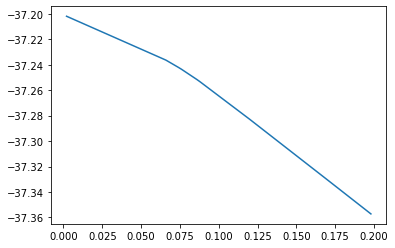

In [39]:
 # finding the best alpha value 
 alpha = []
 error = []

 for i in range(1,100):  
     alpha.append(i/500)
     lml = Lasso(alpha=(i/500))
     error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
 plt.plot(alpha,error)


In [40]:
 #to find show best alpha with least error
 err = tuple(zip(alpha,error))
 df_err = pd.DataFrame(err, columns = ['alpha','error'])
 df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.002,-37.201828


### random forest
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual treeThe random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 20))

ValueError: could not convert string to float: 'Software Engineer'

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(rf.score(X_test, y_test))

0.7824871373819002


### tune using gridsearchCSV

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` wh

RandomForestRegressor(criterion='mse', max_features='log2', n_estimators=160)

In [17]:
gs.best_score_


-14.771732014315242

In [18]:
rf = gs.best_estimator_

rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)

/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [19]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=110)

In [20]:
rf = gs.best_estimator_
rf.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### test

In [21]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)



In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
#liner model



15519139210108.547

In [23]:
mean_absolute_error(y_test,tpred_lml)
#lasso

19.45290726635803

In [24]:
mean_absolute_error(y_test,tpred_rf)
#random forest
##best model


12.031091372316586

In [25]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)


7759569605059.098

In [26]:
#pickle the model, this makes it useable by other programs without needing to retrained 
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )



In [ ]:

#test to make sure the model works 
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']



In [ ]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]



In [ ]:
list(X_test.iloc[1,:])